In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [4]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import normalized_mutual_info_score as NMI

In [7]:
import sys
sys.path.insert(1, "../utilities")
from plot_utils import *
from extract import *
from assigners import *
from effect_estimators import *
#from experimental import *

In [8]:
def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

### Celldata

In [9]:
fnum=3
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

cellshilicposGFstatus.csv
cellshilicposALPHA0.05FC1.0MINVAR0.125.csv


In [10]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2])

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

### Plasmadata

In [313]:
fnum=1
pathGF = "../../../PARKINSONS/PDproj/plasmadata/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/plasmaresults/ttest/mv_32/pori0.05_FC0.5/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

plasmaHILICposGFstatus_log2.csv
plasmaHILICposGFstatus_pori_var0.06FC0.5.csv


In [314]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2,3], ' ')

Area = data_significant.iloc[4:,8:80]
groups = data.iloc[1,8:80]
gender = data.iloc[0,8:80]
labels = LabelEncoder().fit_transform(groups)

### Analysis

In [11]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])
data_significant.iloc[sorted_ind+3,:].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
94,NaN,C30 H57 N O4,-0.07,495.42873,496.436,0.372,No MS2,[M+H]+1,19.054911837856597,18.620844098722333,...,0,0,0,0,0,0,0,0,64,0
106,NaN,C30 H54 O4,-0.21,478.40211,496.436,0.373,No MS2,[M+NH4]+1,19.054911837856597,18.620844098722333,...,64,64,64,64,64,64,64,64,0,64
24,13-hydroxy-alpha-tocopherol,C29 H50 O3,0.19,446.37608,447.38325,0.374,DDA for preferred ion,[M+H]+1,20.88434273807616,20.704578329289475,...,0,0,0,0,0,0,0,0,0,0
303,MFCD09743629,C27 H48 O2,0.67,404.3657,405.3727,0.378,No MS2,[M+H]+1,16.552989929027294,16.172452223805614,...,128,8,8,128,8,128,128,128,128,128
245,NaN,C21 H49 N4 O3 P,1.94,436.35507,419.35186,0.381,No MS2,[M+H-H2O]+1,17.760054334192844,17.391996173856526,...,64,64,64,64,64,128,64,64,128,128


In [12]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)
mass=data_significant.iloc[sorted_ind+3,4].to_numpy(dtype=float)

In [13]:
Y=pd.get_dummies(groups)

In [32]:
pls=PLSRegression(n_components=2).fit(X, Y)
xhat, yhat=pls.transform(X,Y)
y_pred=pls.predict(X)

In [35]:
np.argmax(y_pred, axis=1)

array([2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 0, 3, 3, 0, 0, 3, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

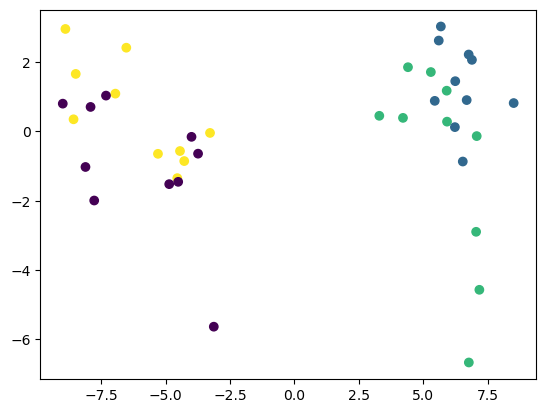

In [37]:
plt.scatter(xhat[:,0],xhat[:,1], c=labels)

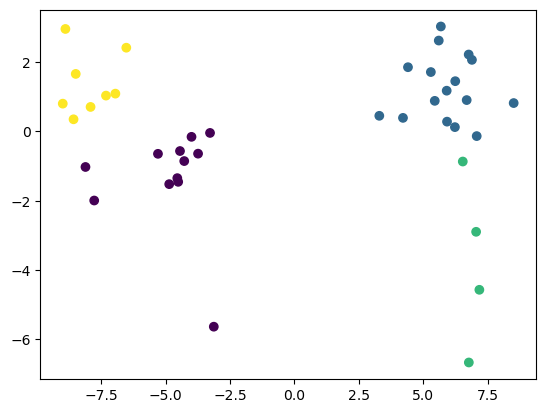

In [38]:
plt.scatter(xhat[:,0],xhat[:,1], c=np.argmax(y_pred, axis=1))

In [76]:
lda=LinearDiscriminantAnalysis(n_components=3, shrinkage=0.5, solver='eigen').fit(X,labels)
xhat = lda.transform(X)
yhat = lda.predict(X)

In [87]:
lda=LinearDiscriminantAnalysis(n_components=3, shrinkage=0.9, solver='eigen').fit(X,labels)
xhat = lda.transform(X)
yhat = lda.predict(X)

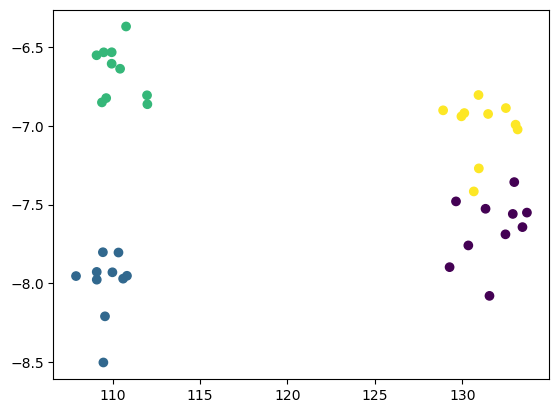

In [89]:
plt.scatter(xhat[:,0],xhat[:,1], c=labels)

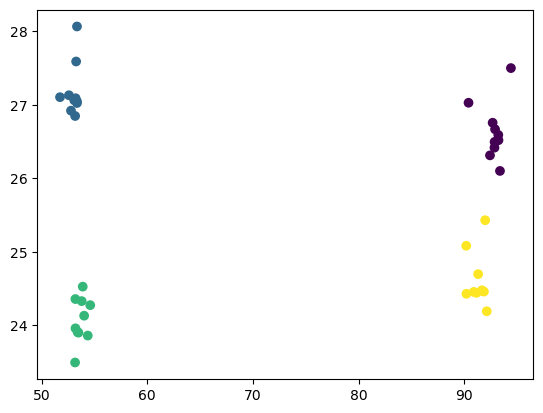

In [65]:
plt.scatter(xhat[:,0],xhat[:,1], c=yhat)

In [116]:
X_std = StandardScaler().fit_transform(X)
lr = LogisticRegression(max_iter=2000, penalty='l1', solver='saga').fit(X_std,labels)

In [117]:
yhat = lr.predict(X_std)

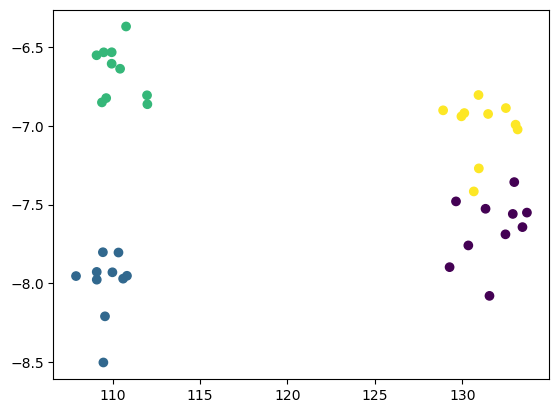

In [122]:
plt.scatter(xhat[:,0],xhat[:,1], c=labels)

In [120]:
NMI(labels, yhat)

0.9404185439808235

In [108]:
np.where(lr.coef_!=0)[1]

array([20, 26, 40, 46, 52,  8, 40, 50, 56, 38, 43, 56,  3,  4,  7, 12, 53],
      dtype=int64)

In [112]:
masstime = np.array(["{}@{}".format(m, t) for m, t in zip(mass, rtime)])
np.unique(masstime[np.where(lr.coef_!=0)[1]])

array(['118.06147@5.74', '118.0866@3.543', '127.05048@5.447',
       '144.10209@4.64', '146.11771@3.084', '179.04861@6.716',
       '205.09724@4.043', '219.11294@0.719', '349.0542@6.887',
       '405.3727@0.378', '419.35184@0.386', '419.35186@0.381',
       '675.54318@0.46', '675.54347@0.954', '716.55819@0.458'],
      dtype='<U15')